In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sn

In [2]:
df=pd.read_csv('countyData2019.csv')
headers = df.iloc[0]
dfc=pd.DataFrame(df.values[1:], columns=headers)


In [3]:
df=pd.read_csv('additionalCountyData2019.csv')
headers = df.iloc[0]
dfca=pd.DataFrame(df.values[1:], columns=headers)


In [4]:
df=pd.read_csv('moreCountyData2019.csv')
dfcma=df


In [5]:
dfI=pd.read_csv('CountyIncome2019.csv')
headersB=dfI.iloc[2]
dfI=pd.DataFrame(dfI.values[3:], columns=headersB)
dfI.drop(dfI.index[dfI['County FIPS Code'] == '000'], inplace = True)
dfI=dfI.reset_index()


In [6]:
#county=dfc[['County', 'Average Daily PM2.5','Income Ratio', '% Unemployed' ]]
#county= pd.concat([county, dfI['Median Household Income'], dfcma[['% Food Insecure','% Limited Access','% Insufficient Sleep','% Rural','Population']],dfca['Life Expectancy']], axis=1)
county=dfc[['County', 'Average Daily PM2.5','Income Ratio', '% Unemployed', '% With Access', 'PCP Rate', 'Dentist Rate', 'MHP Rate' ,'Preventable Hosp. Rate']]
county= pd.concat([county, dfI['Median Household Income'], dfcma[['% Food Insecure' ,'% Limited Access','% Insufficient Sleep','% Rural','% African American' ,'% Asian', '% Hispanic', 'Population','% Not Proficient in English']],dfca['Life Expectancy']], axis=1)
#county=dfc[['County', 'Average Daily PM2.5' ]]
#county= pd.concat([county, dfI['Median Household Income'], dfcma[['% Insufficient Sleep','Population']],dfca['Life Expectancy']], axis=1)

#dfI['Median Household Income']
#dfca['Life Expectancy']


In [7]:
county=county.dropna(axis=0).reset_index(drop=True)
countyNew=county.drop(['County'],axis=1)
countyNew=countyNew.astype(float)
countyNew

,Average Daily PM2.5,Income Ratio,% Unemployed,% With Access,PCP Rate,Dentist Rate,MHP Rate,Preventable Hosp. Rate,Median Household Income,% Food Insecure,% Limited Access,% Insufficient Sleep,% Rural,% African American,% Asian,% Hispanic,Population,% Not Proficient in English,Life Expectancy
0,11.7,4.6,3.9,69.0,42.0,32.0,16.0,6599.0,58233.0,13.0,12.0,36.0,42.0,19.3,1.3,2.9,55504.0,1.0,76.3
1,10.3,4.5,4.0,72.0,73.0,50.0,91.0,3833.0,59871.0,12.0,5.0,33.0,42.3,9.0,1.2,4.6,212628.0,0.0,78.6
2,11.5,5.8,5.9,54.0,39.0,36.0,8.0,4736.0,35972.0,23.0,11.0,39.0,67.8,47.9,0.5,4.2,25270.0,1.0,75.8
3,11.2,4.3,4.4,16.0,57.0,26.0,9.0,5998.0,47918.0,16.0,3.0,38.0,68.4,21.5,0.2,2.6,22668.0,0.0,73.9
4,11.7,4.1,4.0,23.0,23.0,21.0,10.0,4162.0,52902.0,11.0,3.0,36.0,90.0,1.5,0.3,9.6,58013.0,2.0,74.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,5.1,4.4,4.6,90.0,34.0,53.0,230.0,3289.0,80639.0,11.0,11.0,31.0,10.9,1.1,0.8,16.2,43534.0,2.0,77.8
2673,4.9,3.9,3.0,100.0,121.0,86.0,417.0,2341.0,98837.0,10.0,7.0,27.0,46.4,0.5,1.2,15.0,23265.0,4.0,87.4
2674,5.9,4.6,4.5,81.0,39.0,83.0,342.0,3140.0,70756.0,14.0,10.0,31.0,43.1,0.7,0.5,9.2,20495.0,1.0,78.4
2675,4.8,3.6,4.1,82.0,49.0,74.0,347.0,4330.0,55122.0,12.0,4.0,28.0,36.0,0.5,0.8,14.2,8064.0,0.0,80.5


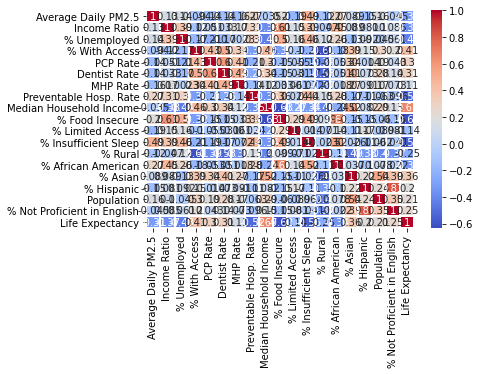

In [8]:
corrMatrix = countyNew.corr()
hm=sn.heatmap(corrMatrix, annot=True, xticklabels=True, yticklabels=True, cmap='coolwarm', linecolor='white', linewidths=1)
figure = hm.get_figure()    
figure.savefig('svm_conf.png',dpi=600)


In [9]:
countyNew=shuffle(countyNew)
dfcma['Population'].median()

25838.5

In [10]:
fullSet=countyNew
trainingSet=countyNew.sample(frac=.9)
part_40=countyNew.drop(trainingSet.index)
validationSet=part_40.sample(frac=.5)
testSet=part_40.drop(validationSet.index)
trainingSet

,Average Daily PM2.5,Income Ratio,% Unemployed,% With Access,PCP Rate,Dentist Rate,MHP Rate,Preventable Hosp. Rate,Median Household Income,% Food Insecure,% Limited Access,% Insufficient Sleep,% Rural,% African American,% Asian,% Hispanic,Population,% Not Proficient in English,Life Expectancy
2214,7.4,4.1,3.0,36.0,24.0,10.0,10.0,5452.0,67171.0,10.0,1.0,33.0,63.0,1.6,0.4,41.9,20638.0,10.0,78.7
808,8.8,3.9,3.9,67.0,59.0,54.0,147.0,3352.0,53371.0,14.0,8.0,32.0,31.3,3.1,0.6,9.4,62510.0,1.0,77.8
252,7.9,4.1,4.3,80.0,62.0,66.0,232.0,3893.0,81015.0,10.0,3.0,29.0,41.4,1.5,2.0,6.3,182177.0,1.0,80.7
1116,7.4,4.2,7.5,95.0,24.0,24.0,48.0,4447.0,44594.0,14.0,1.0,35.0,100.0,0.3,0.2,1.6,8287.0,1.0,74.8
2033,9.8,4.7,4.3,76.0,84.0,87.0,306.0,3888.0,52905.0,17.0,11.0,36.0,9.1,47.0,2.9,5.2,411592.0,1.0,77.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,8.8,3.5,2.8,74.0,73.0,56.0,91.0,3075.0,65834.0,11.0,7.0,28.0,43.5,1.1,1.0,4.1,28708.0,0.0,78.2
2533,9.9,5.1,6.3,5.0,39.0,22.0,22.0,7240.0,43697.0,17.0,3.0,42.0,81.4,0.7,0.1,0.7,22349.0,0.0,72.1
1198,7.0,4.0,3.4,76.0,102.0,76.0,289.0,5657.0,66449.0,11.0,5.0,32.0,36.9,6.0,2.3,3.4,157822.0,2.0,82.2
1171,6.8,4.3,3.2,76.0,78.0,46.0,151.0,4554.0,63849.0,10.0,7.0,30.0,47.9,3.4,4.3,6.5,25831.0,2.0,80.6


In [11]:
scalerA = preprocessing.StandardScaler()
scalerB=preprocessing.StandardScaler()

In [12]:
lengthTrain=len(trainingSet.index)
xtrain=np.ones((lengthTrain,len(trainingSet.columns)))
#put training set feature data into xtrain and make it normalized using min max scaler
xstats=scalerA.fit(fullSet[fullSet.columns[0:-1]].values.astype(float)) 
xtrain=scalerA.transform(trainingSet[trainingSet.columns[0:-1]].values.astype(float)) 

#we normalize life expectancy
ystats=scalerB.fit(fullSet[['Life Expectancy']].values.astype(float))
ytrain=scalerB.transform(trainingSet[['Life Expectancy']].values.astype(float))
print(scalerA.mean_, '\n',scalerB.mean_,'\n')
xtrain

[9.22794173e+00 4.52659694e+00 4.62902503e+00 6.56720209e+01
 5.64826298e+01 4.69043706e+01 1.51646993e+02 4.82764737e+03
 5.62857759e+04 1.38143444e+01 7.36421367e+00 3.33205080e+01
 5.35670900e+01 9.25069107e+00 1.56578259e+00 9.12532686e+00
 1.19847124e+05 1.65969369e+00] 
 [77.43432947] 



array([[-0.97994642, -0.60118598, -1.06835758, ...,  2.53893431,
        -0.27735797,  3.11094678],
       [-0.22941648, -0.88303797, -0.47811384, ...,  0.02127793,
        -0.16029683, -0.24606674],
       [-0.71190001, -0.60118598, -0.21578329, ..., -0.21886776,
         0.17425502, -0.24606674],
       ...,
       [-1.19438354, -0.74211198, -0.80602703, ..., -0.44352018,
         0.10616599,  0.12693477],
       [-1.30160211, -0.31933399, -0.9371923 , ..., -0.20337449,
        -0.26283996,  0.12693477],
       [-0.12219792, -0.74211198, -1.19952285, ...,  0.50931593,
        -0.29124976,  0.87293777]])

In [13]:
xval=np.ones((len(validationSet.index),len(validationSet.columns)))

xval=scalerA.transform(validationSet[validationSet.columns[0:-1]].values.astype(float)) 

yval=scalerB.transform(validationSet[['Life Expectancy']].values.astype(float))
xval

array([[ 1.32525267, -1.44674196,  0.17771253, ..., -0.21112113,
        -0.29555233, -0.24606674],
       [ 0.52111345,  1.51270396,  0.24329517, ..., -0.52873316,
        -0.23036522, -0.24606674],
       [-0.92633714,  1.37177796,  0.70237363, ...,  1.91920351,
         0.43626711,  2.36494378],
       ...,
       [ 0.19945777,  1.79455595,  0.96470418, ..., -0.5364798 ,
        -0.2779926 , -0.61906824],
       [-0.12219792, -0.037482  , -0.08461802, ..., -0.59845288,
        -0.29121621, -0.61906824],
       [-1.19438354, -0.17840799, -0.9371923 , ...,  2.10512275,
        -0.31936602,  1.99194228]])

In [14]:
xtest=np.ones((len(testSet.index),len(testSet.columns)))

xtest=scalerA.transform(testSet[testSet.columns[0:-1]].values.astype(float)) 

ytest=scalerB.transform(testSet[['Life Expectancy']].values.astype(float))
xtest

array([[-0.1758072 ,  0.38529599,  0.636791  , ...,  0.11423755,
        -0.31776968, -0.24606674],
       [-0.92633714, -0.88303797, -1.19952285, ...,  0.98186067,
         0.04080275, -0.24606674],
       [ 1.53968979, -1.16488996,  0.44004308, ..., -0.52873316,
         0.0382419 , -0.61906824],
       ...,
       [ 0.78915986,  1.23085196,  2.14519166, ..., -0.2266144 ,
        -0.28753988, -0.24606674],
       [ 0.14584849, -1.16488996, -0.28136593, ..., -0.23436103,
        -0.27758163, -0.24606674],
       [-1.30160211, -0.31933399, -1.33068813, ..., -0.59070624,
        -0.20068338, -0.61906824]])

In [15]:
def within_range_percent(ypred,yreal):
    return np.count_nonzero(abs(ypred-yreal)<1.5)/len(ypred)

In [16]:
#LIN REG 1

reg=LinearRegression().fit(xtrain,ytrain)
r2=reg.score(xtrain,ytrain)
print(r2,'\n')


0.6598774361496778 



0.7027812370278124 



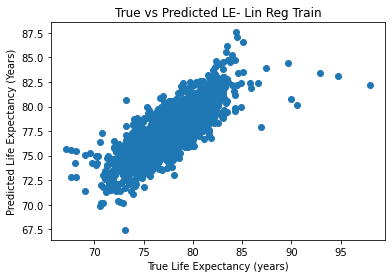

In [17]:
ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(reg.predict(xtrain))

print(within_range_percent(ynewreal,ynewpred),'\n')
plt.plot(ynewreal,ynewpred,'o')
plt.xlabel('True Life Expectancy (years)')
plt.ylabel('Predicted Life Expectancy (Years)')
plt.title('True vs Predicted LE- Lin Reg Train')
plt.savefig('LinearRegTrain.png')

0.7023383191788533 

0.7313432835820896 



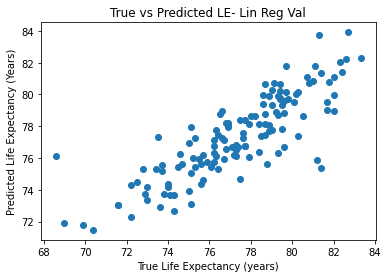

In [18]:
r2=reg.score(xval,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(reg.predict(xval))

print(within_range_percent(ynewreal,ynewpred),'\n')

plt.plot(ynewreal,ynewpred,'o')
plt.xlabel('True Life Expectancy (years)')
plt.ylabel('Predicted Life Expectancy (Years)')
plt.title('True vs Predicted LE- Lin Reg Val')
plt.savefig('LinearRegVal.png')

0.7479475950582471 

0.751349107513491 



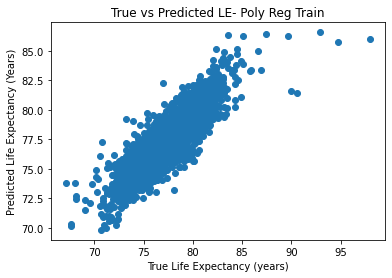

In [19]:
#LIN REG 2
poly = PolynomialFeatures(2)
model=LinearRegression()
xtrainpoly=poly.fit_transform(xtrain)
regB=model.fit(xtrainpoly,ytrain)

r2=regB.score(xtrainpoly,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(regB.predict(xtrainpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

plt.plot(ynewreal,ynewpred,'o')
plt.xlabel('True Life Expectancy (years)')
plt.ylabel('Predicted Life Expectancy (Years)')
plt.title('True vs Predicted LE- Poly Reg Train')
plt.savefig('PolyRegTrain.png')

0.6921887089952781 

0.7388059701492538 



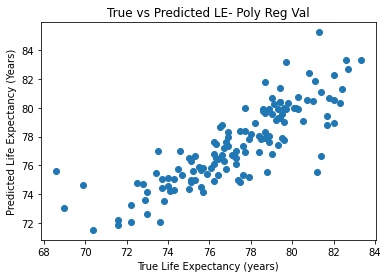

In [20]:
poly = PolynomialFeatures(2)
xvalpoly=poly.fit_transform(xval)
r2=regB.score(xvalpoly,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(regB.predict(xvalpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')


plt.plot(ynewreal,ynewpred,'o')
plt.xlabel('True Life Expectancy (years)')
plt.ylabel('Predicted Life Expectancy (Years)')
plt.title('True vs Predicted LE- Poly Reg Val')
plt.savefig('PolyRegVal.png')


In [21]:
#LIN REG 3
poly = PolynomialFeatures(3)
model=LinearRegression()
xtrainpoly=poly.fit_transform(xtrain)
regB=model.fit(xtrainpoly,ytrain)


r2=regB.score(xtrainpoly,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(regB.predict(xtrainpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')


0.9078299577870821 

0.9153175591531756 



In [22]:
poly = PolynomialFeatures(3)
xvalpoly=poly.fit_transform(xval)
regB.score(xvalpoly,yval)

r2=regB.score(xvalpoly,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(regB.predict(xvalpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

-4.806799003974456 

0.5149253731343284 



In [23]:
#LIN REG 4
poly = PolynomialFeatures(4)
model=LinearRegression()
xtrainpoly=poly.fit_transform(xtrain)
regB=model.fit(xtrainpoly,ytrain)
regB.score(xtrainpoly,ytrain)


r2=regB.score(xtrainpoly,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(regB.predict(xtrainpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

1.0 

1.0 



In [24]:
poly = PolynomialFeatures(4)
xvalpoly=poly.fit_transform(xval)
regB.score(xvalpoly,yval)

r2=regB.score(xvalpoly,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(regB.predict(xvalpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

-103.40184369921172 

0.41044776119402987 



In [25]:
#RIDGE REG 1
model=RidgeCV(alphas=[.1,.4,.2,.25,.05,.5,1,.15,.08,2])
model.n_iter=10^5
clf = model.fit(xtrain, ytrain)



In [26]:
r2=clf.score(xtrain,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(clf.predict(xtrain))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.6598770234109242 

0.7027812370278124 



In [27]:
r2=clf.score(xval,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(clf.predict(xval))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.7024256859303224 

0.7313432835820896 



In [28]:
#RIDGE REG 2
model=RidgeCV(alphas=[.1,.4,.2,.25,.05,.5,1,.15,.08,2])
model.n_iter=10^5
poly = PolynomialFeatures(2)
xtrainpoly=poly.fit_transform(xtrain)
regB=model.fit(xtrainpoly,ytrain)
r2=regB.score(xtrainpoly,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(regB.predict(xtrainpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.7479261825821311 

0.75093399750934 



In [29]:
poly = PolynomialFeatures(2)
xvalpoly=poly.fit_transform(xval)
r2=regB.score(xvalpoly,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(regB.predict(xvalpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.6929227020148483 

0.7388059701492538 



In [30]:
model=RidgeCV(alphas=[.1,.4,.2,.25,.05,.5,1,.15,.08,2,3.1,3.3,3.5,3.7,3.8,4,4.1])
model.n_iter=10^8
poly = PolynomialFeatures(3)
xtrainpoly=poly.fit_transform(xtrain)
regB=model.fit(xtrainpoly,ytrain)

regB=model.fit(xtrainpoly,ytrain)
r2=regB.score(xtrainpoly,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(regB.predict(xtrainpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

0.8959650042097755 

0.8995433789954338 



In [31]:
poly = PolynomialFeatures(3)
xvalpoly=poly.fit_transform(xval)
r2=regB.score(xvalpoly,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(regB.predict(xvalpoly))

print(within_range_percent(ynewreal,ynewpred),'\n')

-2.0237601702804406 

0.5895522388059702 



In [32]:
model=RidgeCV(alphas=[.8,1,1.2,1.4,2,3,4,4.5,5,5.7,5.8,7])
model.n_iter=10^8
poly = PolynomialFeatures(4)
xtrainpoly=poly.fit_transform(xtrain)
regB=model.fit(xtrainpoly,ytrain)



In [33]:
poly = PolynomialFeatures(4)
xvalpoly=poly.fit_transform(xval)


In [34]:
clfB= RandomForestRegressor(n_estimators=100, max_depth=15, random_state=0)
clfB.fit(xtrain,ytrain.ravel())
r2=clfB.score(xtrain,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(clfB.predict(xtrain))

print(within_range_percent(ynewreal.ravel(),np.transpose(ynewpred)),'\n')


0.9491335183066226 

0.9738480697384807 



In [35]:

r2=clfB.score(xval,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(clfB.predict(xval))

print(within_range_percent(ynewreal.ravel(),np.transpose(ynewpred)),'\n')

0.6737844001284863 

0.7910447761194029 



In [36]:
clfB= RandomForestRegressor(n_estimators=200, max_depth=15, random_state=0)
clfB.fit(xtrain,ytrain.ravel())
r2=clfB.score(xtrain,ytrain)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(clfB.predict(xtrain))

print(within_range_percent(ynewreal.ravel(),np.transpose(ynewpred)),'\n')

0.9512217637099432 

0.9763387297633873 



In [37]:
r2=clfB.score(xval,yval.ravel())
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(clfB.predict(xval))

print(within_range_percent(ynewreal.ravel(),np.transpose(ynewpred)),'\n')

0.6787059756288237 

0.7910447761194029 



In [38]:
clfB= RandomForestRegressor(n_estimators=300, max_depth=15, random_state=0)
clfB.fit(xtrain,ytrain.ravel())
r2=clfB.score(xtrain,ytrain.ravel())
print(r2,'\n')

ynewreal=scalerB.inverse_transform(ytrain)
ynewpred=scalerB.inverse_transform(clfB.predict(xtrain))

print(within_range_percent(ynewreal.ravel(),np.transpose(ynewpred)),'\n')

0.9516746612013618 

0.9759236197592362 



In [39]:
r2=clfB.score(xval,yval)
print(r2,'\n')

ynewreal=scalerB.inverse_transform(yval)
ynewpred=scalerB.inverse_transform(clfB.predict(xval))

print(within_range_percent(ynewreal.ravel(),np.transpose(ynewpred)),'\n')

0.6805574529857836 

0.7761194029850746 



###### 